In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from category_encoders import OneHotEncoder

from utils import *

In [2]:
# Read csv file
df = pd.read_csv("../data/bank_transactions.csv.zip")
df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5

In [66]:
# Overview the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [3]:
# check cardianality of categorical features
df.nunique()

TransactionID              1048567
CustomerID                  884265
CustomerDOB                  17254
CustGender                       3
CustLocation                  9355
CustAccountBalance          161328
TransactionDate                 55
TransactionTime              81918
TransactionAmount (INR)      93024
dtype: int64

In [4]:
# Remove high-cardinality categorical features
df.drop(columns=["CustomerID", "TransactionID", "TransactionTime", "TransactionDate"], inplace=True)

In [5]:
# Check Null columns
df.isna().sum()

CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionAmount (INR)       0
dtype: int64

In [6]:
# Remvove Null values form 
df.dropna(inplace=True)

In [89]:
# Describe the datasets
df.describe()

CustAccountBalance  TransactionAmount (INR)
count        1.041614e+06             1.041614e+06
mean         1.149986e+05             1.566096e+03
std          8.467609e+05             6.561464e+03
min          0.000000e+00             0.000000e+00
25%          4.728140e+03             1.600000e+02
50%          1.676852e+04             4.575000e+02
75%          5.742885e+04             1.200000e+03
max          1.150355e+08             1.560035e+06

### Customer Location

In [7]:
# select customer location
mask = df["CustLocation"] == "MUMBAI"
df = df[mask]
# drop customer location
df.drop(columns="CustLocation", inplace=True)

### Customer Account Balance

In [120]:
# visualize customer Account Balance
fig = plot_boxplot(
    data=df, 
    x="CustAccountBalance",
    title="Customer Account Balance",
    x_axis="Account Balance",
    y_axis="Frequency"
)

fig.show()

As we see their outlier in the Customer Account balance so you have to remove these outliers to make the data balance.

In [8]:
# Remove outliers
df = remove_outliers(df, "CustAccountBalance", q2=0.98)

In [122]:
# visualize balanced data of customer Account Balance
fig = plot_boxplot(
    data=df, 
    x="CustAccountBalance",
    title="Customer Account Balance",
    x_axis="Account Balance",
    y_axis="Frequency"
)

fig.show()

### Transaction Amount

In [123]:
# visualize customer Account Balance
fig = plot_boxplot(
    data=df,
    x="TransactionAmount (INR)",
    title="Transaction Amount of Customers",
    x_axis="Amount [INR]"
)

fig.show()

Their is outliers in transaction Amount so we have to remove these outliers to make the data balance.

In [9]:
df = remove_outliers(df, "TransactionAmount (INR)", q1=0.01, q2=0.99)

In [125]:
# visualize customer Account Balance
fig = plot_boxplot(
    data=df,
    x="TransactionAmount (INR)",
    title="Transaction Amount of Customers",
    x_axis="Amount [INR]"
)

fig.show()

### Age

In [103]:
# convert the string date of birth into datetime format
dob = pd.to_datetime(df["CustomerDOB"].astype(str), format='%d/%m/%y', errors = 'coerce')
dob

2         1996-11-26
7         1982-01-27
9         1984-06-22
16               NaT
18        1991-01-11
             ...    
1048512   1992-10-10
1048513   1983-07-03
1048527   1989-12-10
1048540          NaT
1048544   1971-10-05
Name: CustomerDOB, Length: 54097, dtype: datetime64[ns]

In [78]:
dob.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: CustomerDOB, dtype: object

As we see years from 25 - 68 directly converted into 2025 - 2068 instead of 1925 - 1968. so we can't directly change the string into datetime format. we have follow different approch.

In [10]:
df["Age"] = (
    df["CustomerDOB"]
    .str.split("/", expand=True)[2]
    .astype(int)
    .apply(lambda x : np.abs(2016 - int("19" + str(x)))if (x >= 20) and (x <= 99) else np.abs(2016 - int("20" + str(x))))
)

In [11]:
# Remove CustomerDOB column
df.drop(columns="CustomerDOB", inplace=True)

In [128]:
df["Age"].describe()

count     88151.000000
mean       8466.714921
std       40169.759178
min           2.000000
25%          26.000000
50%          30.000000
75%          37.000000
max      199784.000000
Name: Age, dtype: float64

In [12]:
# Remove outliers
df = remove_outliers(df, "Age", q1=0.001, q2=0.956)

<AxesSubplot:xlabel='Age'>

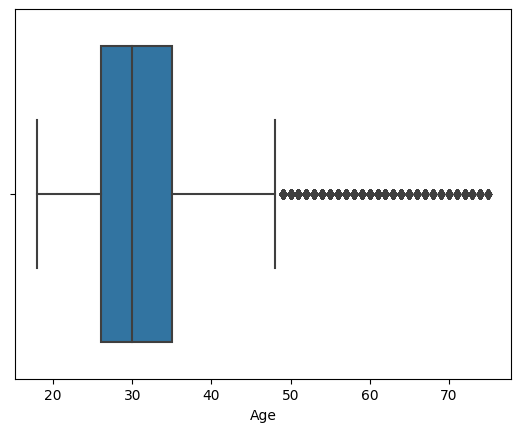

In [130]:
sns.boxplot(
    x = "Age",
    data=df
)

### Gender

In [131]:
df["CustGender"].value_counts()

M    56683
F    27533
Name: CustGender, dtype: int64

In [140]:
# Encode customer gender
# Instantiate
# ohe = OneHotEncoder(use_cat_names=True)
# ohe.fit(df["CustGender"])
# ohe.transform(df["CustGender"])

In [13]:
# Label encoding
# Instantiate
lb = LabelEncoder()
lb.fit(df["CustGender"])
df["CustGender"] = lb.transform(df["CustGender"])

#### Save the data

In [14]:
df.head()

CustGender  CustAccountBalance  TransactionAmount (INR)  Age
2           0            17874.44                   459.00   20
3           0           866503.21                  2060.00   43
6           0              973.46                   566.00   24
7           1            95075.54                   148.00   34
9           1             4279.22                   289.11   32

In [15]:
# Save the clean data
df.to_csv("../data/clean_data.csv", index=False)